<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Juan Ospina
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial.
<br>
<i><b>Tema:</b></i> Regresion Logistica.
<br>
<i><b>Estudiantes</b></i>
  <li>Hugo Espinosa </li> 
  <li>Juan Esteban Arias </li>
  <li>Juan Camilo Hernandez Ibañez</li>
  <li>Santiago Javier Vivas Piamba</li>

</FONT>
</div>

# __Análisis de sentimientos para alienígenas__

Un astronauta aterrizan en un planeta distante donde existe una raza alienígena. El lenguaje de los alienígenas solo cuenta con dos palabras “aack” y “beep”. Los alienígenas solo cuentan con dos estados ánimo “triste” y “feliz”. Para entender a los alienigenas se cuenta con un modelo en donde un punto en el plano representa la cantidad de palabras en la oración. Por ejemplo, la oración ¡aack aack beep aack! Estará representada por el punto (3, 1).

<center>

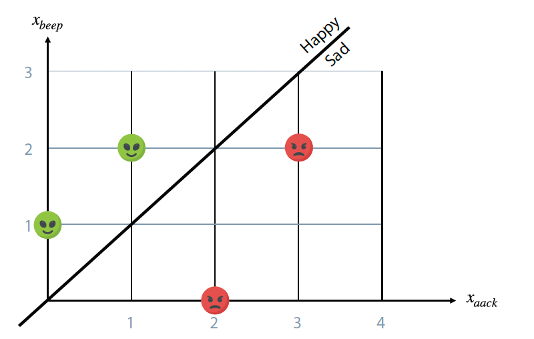

</center>

In [ ]:
# Se importan las librerias correspondientes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.array([[3, 2], [1, 2], [0, 1], [2, 0]])
y = np.array([0, 1, 1, 0])

# **Problema**

* Visualice los datos utilizando un diagrama de dispersión 

* Encuentre la ecuación de la recta que representa el modelo y visualícela en el gráfico anterior

* Construya una función que determine el score de un punto arbitrario en el plano (este punto representará una nueva oración en el lenaguje alienigena). Recuerde que la función del score debería tener la forma: $f(x_1, x_2) =  \theta_2x_2  + \theta_1 x_1 + \theta_0 $

* Ubique tres puntos en la gráfica: uno por encima de la línea; uno sobre la línea; uno por debajo de la línea. ¿Cuál es el resultado de evaluar la función $f(x_1, x_2)$ en cada uno de los puntos seleccionados?

* Implemente la función de sigmoid

* Construya una función que, utilizando la función de sigmoid y la función del score, realice la predicción sobre el estado de ánimo de una nueva oración en el lenguaje alienígena (un punto en el plano).   

* Utilice la función log-loss de sckit-learn para calcular el error del clasificador.

* Utilice la clase `SGDClassifier` para entrenar un modelo (recuerde definir la función de pérdida en los parámetros de la clase). Compare los coeficientes, las probabilidades y el error con el modelo original.
* Utilice la clase `LogisticRegression` para entrenar un modelo. Compare los coeficientes, las probabilidades y el error con el modelo original.

In [ ]:
data = pd.DataFrame()
data["Aack"]= [3,1,0,2]
data["Beep"]= [2,2,1,0]

In [ ]:
f = lambda x : x
o = lambda x : 1/(1+np.exp(-x))

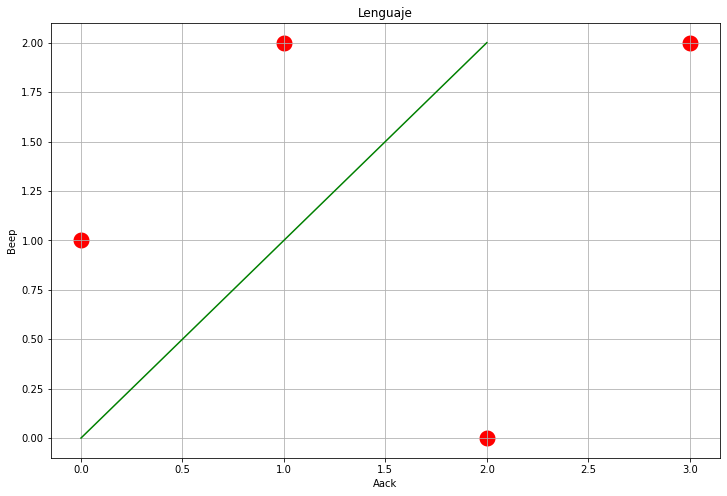

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Lenguaje")
plt.xlabel("Aack")
plt.ylabel("Beep")
plt.scatter(data["Aack"], data["Beep"], color="red", linewidths=10)
plt.plot(data["Beep"],f(data["Beep"]),color='green')
plt.grid()

In [ ]:
# Se define la funcion score y la funcion determinar que va a servir para realizar las predicciones
def score(xAack,xBeep):
  return xAack - xBeep

def determinar(xAack,xBeep):
  if score(xAack,xBeep) > 0:
    return "Es Triste"
  elif(score(xAack,xBeep) < 0):
    return "Es Feliz"
  else:
    return "No te entiendo"

In [ ]:
print("El punto (1,0): " , determinar(1,0))
print("El punto (2,2): " , determinar(2,2))
print("El punto (3,2): " , determinar(3,2))
print("El punto (0,1): " , determinar(0,1))

El punto (1,0):  Es Triste
El punto (2,2):  No te entiendo
El punto (3,2):  Es Triste
El punto (0,1):  Es Feliz


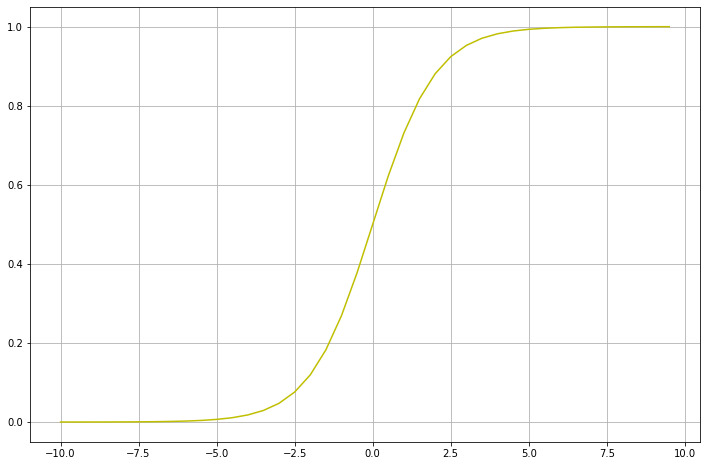

In [ ]:
#Se define la función de sigmoid para obtener un resultado entre uno y cero
#El cual determinara la probabilidad de un objeto el hacer parte de una clase

vector = np.arange(-10,10,0.5)
plt.figure(figsize=(12,8))
plt.plot(vector,o(vector),color='y')
plt.grid()

In [ ]:
#Se define la función para obtener la probabilidad
def logistic(score):
  return o(score)

In [ ]:
print("Encima de la recta: ",logistic(score(0,2)))
print("sobre la recta: ",logistic(score(2,2)))
print("Debajo de la recta: ",logistic(score(3,2)))

Encima de la recta:  0.11920292202211755
sobre la recta:  0.5
Debajo de la recta:  0.7310585786300049


In [ ]:
#Se utiliza la función Log_loss para obtener el error del modelo
log_loss(["Triste", "Triste", "Feliz", "Feliz"],[[1, 0], [1, 2], [2, 0], [3, 2]])

8.981267689007645

In [ ]:
#Se define la clase SGDClassifier para entrenar el modelo
sgd = SGDClassifier(loss='log')
sgd.fit(X, y)

SGDClassifier(loss='log')

In [ ]:
#Se realizan las comparaciones de los coeficientes, las probabilidades y el error con el modelo original.
clf = SGDClassifier(max_iter=1000, tol=1e-3, loss='log')
clf.fit(X, y)
y_pred_clf=clf.predict(X)
print(f'Probabilidades: \n{clf.predict_proba(X)}\n')
print(f'Coeficientes del modelo: {clf.coef_}\n')
print(f'Error modelo: {log_loss(y,y_pred_clf)}\n')

Probabilidades: 
[[1.00000000e+00 3.74607384e-22]
 [3.33272010e-04 9.99666728e-01]
 [1.31251949e-08 9.99999987e-01]
 [1.00000000e+00 8.54106374e-26]]

Coeficientes del modelo: [[-28.67119098  18.52867705]]

Error modelo: 9.992007221626415e-16



In [ ]:
#Utilice la clase LogisticRegression para entrenar un modelo. Compare los coeficientes, las probabilidades y el error con el modelo original.
clf2 = LogisticRegression(random_state=0).fit(X, y)
y_pred_clf2=clf2.predict(X)
print(f'Probabilidades: \n{clf2.predict_proba(X)}\n')
print(f'Coeficientes del modelo: {clf2.coef_}\n')
print(f'Error modelo: {log_loss(y,y_pred_clf2)}\n')

Probabilidades: 
[[0.76194473 0.23805527]
 [0.31791488 0.68208512]
 [0.20370165 0.79629835]
 [0.71643552 0.28356448]]

Coeficientes del modelo: [[-0.96337097  0.36342428]]

Error modelo: 9.992007221626415e-16



# **Conclusión**

<p align="justify">
Con los resultados obtenidos por parte de ambos modelos, se concluye que el modelo realizado a "mano" tiene un menor porcentaje de error a diferencia del modelo entregado por Sklearn. Una de las razones puede ser los pocos datos que se tienen para entrenar el modelo. De igual manera, los resultados obtenidos en cuanto al error por parte de <strong>SGDClassifier</strong> y <strong>Logistic Regression</strong> resultan ser identicos, a diferencia de sus coeficientes, idicando cada modelo una recta diferente
</p>